In [42]:
from pyspark import SparkContext
import pandas as pd


sc = SparkContext("local", "sec1ond app")

In [86]:
data = pd.read_csv('data_reports_monthly.csv')
data

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
0,2021-06,Yellow,"94,130","1,607,814","7,084","5,636","4,570",24.3,9.1,20.8,8.4,14.1,78%,-
1,2021-06,Green,"2,891","65,833","1,002",976,531,16.3,4.2,16.1,4.2,20.5,75%,-
2,2021-06,FHV - High Volume,"498,641",-,"58,797","57,856","36,922",19.1,6.9,19.0,6.9,19,-,124
3,2021-05,FHV - Black Car,"13,022",-,"4,294","4,278","2,070",15.0,4.6,15.0,4.6,24,-,-
4,2021-05,FHV - Livery,"27,753",-,"5,296","5,202","3,328",19.8,5.2,19.8,5.2,18,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,2010-05,Yellow,"499,374","5,561,218","30,950","13,309","12,729",29.6,14.8,22.7,8.3,-,35%,-
538,2010-04,Yellow,"504,798","5,502,545","30,827","13,326","12,856",28.9,14.8,22.3,8.3,-,35%,-
539,2010-03,Yellow,"415,567","3,011,750","28,709","12,183","10,382",26.4,15.1,20.4,8.3,11.5,35%,-
540,2010-02,Yellow,"397,969","3,392,416","28,255","12,171","10,045",23.1,14.6,17.6,8.3,11.1,35%,-


In [108]:
schemaString = "date class trips farebox drives vehicles vehicles_day avg_vehicles_road avg_hour_vehicle avg_day_driver avg_hour_driver avg_minute_trip percent_card trip_shared"

from pyspark.sql.types import StructField,StringType,StructType

fields = [StructField(field_name, StringType(), True) for field_name in schemaString.split()]
schema = StructType(fields)

In [109]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)


In [110]:
sparkDF = sqlContext.createDataFrame(data, schema)
sparkDF.printSchema()
sparkDF.show()

root
 |-- date: string (nullable = true)
 |-- class: string (nullable = true)
 |-- trips: string (nullable = true)
 |-- farebox: string (nullable = true)
 |-- drives: string (nullable = true)
 |-- vehicles: string (nullable = true)
 |-- vehicles_day: string (nullable = true)
 |-- avg_vehicles_road: string (nullable = true)
 |-- avg_hour_vehicle: string (nullable = true)
 |-- avg_day_driver: string (nullable = true)
 |-- avg_hour_driver: string (nullable = true)
 |-- avg_minute_trip: string (nullable = true)
 |-- percent_card: string (nullable = true)
 |-- trip_shared: string (nullable = true)

+-------+-----------------+---------+-----------+--------+--------+------------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+
|   date|            class|    trips|    farebox|  drives|vehicles|vehicles_day|avg_vehicles_road|avg_hour_vehicle|avg_day_driver|avg_hour_driver|avg_minute_trip|percent_card|trip_shared|
+-------+--------------

In [115]:
sparkDF = sparkDF.withColumn('trips', regexp_replace('trips', ',', ''))
sparkDF = sparkDF.withColumn("trips", sparkDF["trips"].cast(IntegerType()))

sparkDF.show()
sparkDF.printSchema()

+-------+-----------------+------+-----------+--------+--------+------------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+
|   date|            class| trips|    farebox|  drives|vehicles|vehicles_day|avg_vehicles_road|avg_hour_vehicle|avg_day_driver|avg_hour_driver|avg_minute_trip|percent_card|trip_shared|
+-------+-----------------+------+-----------+--------+--------+------------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+
|2021-06|           Yellow| 94130| 1,607,814 |  7,084 |  5,636 |      4,570 |             24.3|             9.1|          20.8|            8.4|           14.1|         78%|          -|
|2021-06|            Green|  2891|    65,833 |  1,002 |    976 |        531 |             16.3|             4.2|          16.1|            4.2|           20.5|         75%|          -|
|2021-06|FHV - High Volume|498641|          -| 58,797 | 57,856 |     36,922

In [116]:
from pyspark.sql.functions import regexp_replace

sparkDF = sparkDF.withColumn('vehicles', regexp_replace('vehicles', ',', ''))
sparkDF = sparkDF.withColumn("vehicles", sparkDF["vehicles"].cast(IntegerType()))

sparkDF.show()
sparkDF.printSchema()

+-------+-----------------+------+-----------+--------+--------+------------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+
|   date|            class| trips|    farebox|  drives|vehicles|vehicles_day|avg_vehicles_road|avg_hour_vehicle|avg_day_driver|avg_hour_driver|avg_minute_trip|percent_card|trip_shared|
+-------+-----------------+------+-----------+--------+--------+------------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+
|2021-06|           Yellow| 94130| 1,607,814 |  7,084 |    5636|      4,570 |             24.3|             9.1|          20.8|            8.4|           14.1|         78%|          -|
|2021-06|            Green|  2891|    65,833 |  1,002 |     976|        531 |             16.3|             4.2|          16.1|            4.2|           20.5|         75%|          -|
|2021-06|FHV - High Volume|498641|          -| 58,797 |   57856|     36,922

In [117]:
sparkDF.filter(sparkDF['trips'] > 1000).show()
sparkDF.groupBy("class").sum("trips").show()

+-------+-----------------+------+-----------+--------+--------+------------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+
|   date|            class| trips|    farebox|  drives|vehicles|vehicles_day|avg_vehicles_road|avg_hour_vehicle|avg_day_driver|avg_hour_driver|avg_minute_trip|percent_card|trip_shared|
+-------+-----------------+------+-----------+--------+--------+------------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+
|2021-06|           Yellow| 94130| 1,607,814 |  7,084 |    5636|      4,570 |             24.3|             9.1|          20.8|            8.4|           14.1|         78%|          -|
|2021-06|            Green|  2891|    65,833 |  1,002 |     976|        531 |             16.3|             4.2|          16.1|            4.2|           20.5|         75%|          -|
|2021-06|FHV - High Volume|498641|          -| 58,797 |   57856|     36,922

In [119]:
sparkDF = sparkDF.withColumnRenamed("class","vehicle_class")
sparkDF.show(5)

+-------+-----------------+------+-----------+--------+--------+------------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+
|   date|    vehicle_class| trips|    farebox|  drives|vehicles|vehicles_day|avg_vehicles_road|avg_hour_vehicle|avg_day_driver|avg_hour_driver|avg_minute_trip|percent_card|trip_shared|
+-------+-----------------+------+-----------+--------+--------+------------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+
|2021-06|           Yellow| 94130| 1,607,814 |  7,084 |    5636|      4,570 |             24.3|             9.1|          20.8|            8.4|           14.1|         78%|          -|
|2021-06|            Green|  2891|    65,833 |  1,002 |     976|        531 |             16.3|             4.2|          16.1|            4.2|           20.5|         75%|          -|
|2021-06|FHV - High Volume|498641|          -| 58,797 |   57856|     36,922

In [121]:
from pyspark.sql.functions import split

split_col = split(sparkDF['date'], '-')

sparkDF = sparkDF.withColumn('year', split_col.getItem(0))
sparkDF = sparkDF.withColumn('month', split_col.getItem(1))
sparkDF.show()


+-------+-----------------+------+-----------+--------+--------+------------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+----+-----+
|   date|    vehicle_class| trips|    farebox|  drives|vehicles|vehicles_day|avg_vehicles_road|avg_hour_vehicle|avg_day_driver|avg_hour_driver|avg_minute_trip|percent_card|trip_shared|year|month|
+-------+-----------------+------+-----------+--------+--------+------------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+----+-----+
|2021-06|           Yellow| 94130| 1,607,814 |  7,084 |    5636|      4,570 |             24.3|             9.1|          20.8|            8.4|           14.1|         78%|          -|2021|   06|
|2021-06|            Green|  2891|    65,833 |  1,002 |     976|        531 |             16.3|             4.2|          16.1|            4.2|           20.5|         75%|          -|2021|   06|
|2021-06|FHV - High 

In [123]:
sparkDF = sparkDF.drop('vehicles_day')
sparkDF.show()

+-------+-----------------+------+-----------+--------+--------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+----+-----+
|   date|    vehicle_class| trips|    farebox|  drives|vehicles|avg_vehicles_road|avg_hour_vehicle|avg_day_driver|avg_hour_driver|avg_minute_trip|percent_card|trip_shared|year|month|
+-------+-----------------+------+-----------+--------+--------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+----+-----+
|2021-06|           Yellow| 94130| 1,607,814 |  7,084 |    5636|             24.3|             9.1|          20.8|            8.4|           14.1|         78%|          -|2021|   06|
|2021-06|            Green|  2891|    65,833 |  1,002 |     976|             16.3|             4.2|          16.1|            4.2|           20.5|         75%|          -|2021|   06|
|2021-06|FHV - High Volume|498641|          -| 58,797 |   57856|             19.1|   

In [126]:
sparkDF.createOrReplaceTempView("trips")

sqlDF = sqlContext.sql("SELECT date, vehicle_class, trips FROM trips where trips > 1000")
sqlDF.show()

+-------+-----------------+------+
|   date|    vehicle_class| trips|
+-------+-----------------+------+
|2021-06|           Yellow| 94130|
|2021-06|            Green|  2891|
|2021-06|FHV - High Volume|498641|
|2021-05|  FHV - Black Car| 13022|
|2021-05|     FHV - Livery| 27753|
|2021-05|FHV - High Volume|474753|
|2021-05|            Green|  2843|
|2021-05|           Yellow| 80499|
|2021-04|  FHV - Black Car| 12658|
|2021-04|     FHV - Livery| 26758|
|2021-04|FHV - High Volume|470299|
|2021-04|            Green|  2896|
|2021-04|           Yellow| 71982|
|2021-03|  FHV - Black Car| 13000|
|2021-03|     FHV - Livery| 28654|
|2021-03|FHV - High Volume|458777|
|2021-03|            Green|  2703|
|2021-03|           Yellow| 61643|
|2021-02|  FHV - Black Car| 10716|
|2021-02|FHV - High Volume|414755|
+-------+-----------------+------+
only showing top 20 rows



In [130]:
sqlDF = sqlContext.sql("SELECT vehicle_class, sum(trips) FROM trips where trips > 1000 GROUP BY date, vehicle_class ")
sqlDF.show()

+-----------------+----------+
|    vehicle_class|sum(trips)|
+-----------------+----------+
|FHV - High Volume|    357610|
|  FHV - Black Car|     16612|
|   FHV - Lux Limo|      1513|
|FHV - High Volume|    642341|
|  FHV - Black Car|     16826|
|FHV - High Volume|    429691|
|           Yellow|    325857|
|     FHV - Livery|     85721|
|           Yellow|    518212|
|  FHV - Black Car|     11293|
|FHV - High Volume|    374990|
|  FHV - Black Car|      7574|
|  FHV - Black Car|     13985|
|           Yellow|    435701|
|           Yellow|    460393|
|           Yellow|    479527|
|     FHV - Livery|     43938|
|   FHV - Lux Limo|      3240|
|   FHV - Lux Limo|      5554|
|           Yellow|    501708|
+-----------------+----------+
only showing top 20 rows



In [131]:
sqlDF.na.fill(value='').show()

#Replace Replace 0 for null on only population column 
sqlDF.na.fill(value='',subset=["vehicle_class"]).show()

+-----------------+----------+
|    vehicle_class|sum(trips)|
+-----------------+----------+
|FHV - High Volume|    357610|
|  FHV - Black Car|     16612|
|   FHV - Lux Limo|      1513|
|FHV - High Volume|    642341|
|  FHV - Black Car|     16826|
|FHV - High Volume|    429691|
|           Yellow|    325857|
|     FHV - Livery|     85721|
|           Yellow|    518212|
|  FHV - Black Car|     11293|
|FHV - High Volume|    374990|
|  FHV - Black Car|      7574|
|  FHV - Black Car|     13985|
|           Yellow|    435701|
|           Yellow|    460393|
|           Yellow|    479527|
|     FHV - Livery|     43938|
|   FHV - Lux Limo|      3240|
|   FHV - Lux Limo|      5554|
|           Yellow|    501708|
+-----------------+----------+
only showing top 20 rows

+-----------------+----------+
|    vehicle_class|sum(trips)|
+-----------------+----------+
|FHV - High Volume|    357610|
|  FHV - Black Car|     16612|
|   FHV - Lux Limo|      1513|
|FHV - High Volume|    642341|
|  FHV - Blac

In [133]:
pandasDF = sqlDF.toPandas()
print(pandasDF)


         vehicle_class  sum(trips)
0    FHV - High Volume      357610
1      FHV - Black Car       16612
2       FHV - Lux Limo        1513
3    FHV - High Volume      642341
4      FHV - Black Car       16826
..                 ...         ...
522    FHV - Black Car       17207
523    FHV - Black Car       14535
524             Yellow      482811
525             Yellow      503152
526             Yellow      499374

[527 rows x 2 columns]


In [144]:
sparkDF.show()
df = sparkDF.groupBy("date") \
       .sum("vehicles", "trips") \
       .withColumnRenamed("sum(vehicles)", "vechicles") \
       .withColumnRenamed("sum(trips)","trips")

+-------+-----------------+------+-----------+--------+--------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+----+-----+
|   date|    vehicle_class| trips|    farebox|  drives|vehicles|avg_vehicles_road|avg_hour_vehicle|avg_day_driver|avg_hour_driver|avg_minute_trip|percent_card|trip_shared|year|month|
+-------+-----------------+------+-----------+--------+--------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+----+-----+
|2021-06|           Yellow| 94130| 1,607,814 |  7,084 |    5636|             24.3|             9.1|          20.8|            8.4|           14.1|         78%|          -|2021|   06|
|2021-06|            Green|  2891|    65,833 |  1,002 |     976|             16.3|             4.2|          16.1|            4.2|           20.5|         75%|          -|2021|   06|
|2021-06|FHV - High Volume|498641|          -| 58,797 |   57856|             19.1|   

       date  vechicles    trips
0   2020-06      41734   304485
1   2020-12      68046   460969
2   2018-10     117133  1054264
3   2013-09      13785   471779
4   2010-08      12206   404115
..      ...        ...      ...
73  2020-10      68788   520783
74  2018-09     112871  1008901
75  2017-01      95162   788284
76  2018-07     111852   967165
77  2012-03      13320   520764

[78 rows x 3 columns]


<AxesSubplot:xlabel='vechicles', ylabel='trips'>

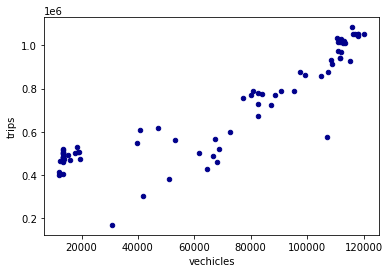

In [151]:
pandasDF = df.sample(0.6).toPandas()
print(pandasDF)
pandasDF.plot.scatter(x='vechicles', y='trips', c='DarkBlue')

In [153]:
from pyspark.ml.feature import VectorAssembler


vectorAssembler = VectorAssembler(inputCols = ['vechicles'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(df)
vhouse_df = vhouse_df.select(['features', 'trips'])
vhouse_df.show(3)

+---------+------+
| features| trips|
+---------+------+
|[41734.0]|304485|
|[13334.0]|492962|
|[68046.0]|460969|
+---------+------+
only showing top 3 rows



In [155]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [157]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='trips', maxIter=10, regParam=0.3, elasticNetParam=0.8)

lr_model = lr.fit(train_df)

print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

21/08/22 18:35:31 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
21/08/22 18:35:31 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


Coefficients: [5.079590573004408]
Intercept: 360190.02991287474


In [159]:
trainingSummary = lr_model.summary
print("r2: %f" % trainingSummary.r2)

r2: 0.805539


In [160]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","trips","features").show()

+------------------+-------+----------+
|        prediction|  trips|  features|
+------------------+-------+----------+
| 906393.3246374656| 874697|[107529.0]|
| 441930.8014136617| 470069| [16092.0]|
| 928017.1417067456|1015410|[111786.0]|
|427956.84774732654| 479148| [13341.0]|
| 766415.0472171833| 769659| [79972.0]|
| 427702.8682186763| 501708| [13291.0]|
| 911467.8356198971| 934016|[108528.0]|
| 922571.8206124848|1033744|[110714.0]|
| 760746.2241377104| 708300| [78856.0]|
| 427773.9824866984| 479376| [13305.0]|
|  854794.843596887| 875966| [97371.0]|
| 830880.1311791822| 823614| [92663.0]|
|427875.57429815846| 502097| [13325.0]|
| 810668.4402891977| 768048| [88684.0]|
| 897199.2657003277| 805244|[105719.0]|
| 702457.9223124848| 565406| [67381.0]|
|  673900.464111054| 501175| [61759.0]|
| 944805.1885505251| 928140|[115091.0]|
| 892429.5301522766| 856428|[104780.0]|
| 427773.9824866984| 494137| [13305.0]|
+------------------+-------+----------+
only showing top 20 rows



In [161]:
sparkDF = sparkDF.withColumn('avg_hour_vehicle', regexp_replace('avg_hour_vehicle', ',', ''))
sparkDF = sparkDF.withColumn("avg_hour_vehicle", sparkDF["avg_hour_vehicle"].cast(IntegerType()))

sparkDF.show()
sparkDF.printSchema()

+-------+-----------------+------+-----------+--------+--------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+----+-----+
|   date|    vehicle_class| trips|    farebox|  drives|vehicles|avg_vehicles_road|avg_hour_vehicle|avg_day_driver|avg_hour_driver|avg_minute_trip|percent_card|trip_shared|year|month|
+-------+-----------------+------+-----------+--------+--------+-----------------+----------------+--------------+---------------+---------------+------------+-----------+----+-----+
|2021-06|           Yellow| 94130| 1,607,814 |  7,084 |    5636|             24.3|               9|          20.8|            8.4|           14.1|         78%|          -|2021|   06|
|2021-06|            Green|  2891|    65,833 |  1,002 |     976|             16.3|               4|          16.1|            4.2|           20.5|         75%|          -|2021|   06|
|2021-06|FHV - High Volume|498641|          -| 58,797 |   57856|             19.1|   

In [173]:
from pyspark.sql import functions

df = sparkDF.groupBy("date") \
       .agg(functions.sum('vehicles'), functions.sum('trips'), functions.avg('avg_hour_vehicle')) \
       .withColumnRenamed("sum(vehicles)", "vechicles") \
       .withColumnRenamed("sum(trips)","trips") \
       .withColumnRenamed("avg(avg_hour_vehicle)","avg_hour_vehicle")

In [174]:
df.show()

+-------+---------+-------+-----------------+
|   date|vechicles|  trips| avg_hour_vehicle|
+-------+---------+-------+-----------------+
|2020-06|    41734| 304485|4.666666666666667|
|2013-05|    13334| 492962|             15.0|
|2020-12|    68046| 460969|              4.5|
|2019-10|   113770| 984481|5.166666666666667|
|2018-10|   117133|1054264|              5.5|
|2020-02|   109897|1037794|5.166666666666667|
|2013-09|    13785| 471779|             10.0|
|2010-08|    12206| 404115|             14.0|
|2017-09|   107529| 874697|5.333333333333333|
|2019-11|   111786|1015410|5.166666666666667|
|2013-12|    16092| 470069|             10.0|
|2021-04|    69698| 585301|              5.0|
|2010-11|    12347| 463701|             14.0|
|2013-06|    13341| 479148|             15.0|
|2010-02|    12171| 397969|             14.0|
|2017-10|   108796| 915780|              5.5|
|2021-06|    64468| 595662|6.333333333333333|
|2010-04|    13326| 504798|             14.0|
|2016-02|    79972| 769659|5.66666

       date  vechicles    trips  avg_hour_vehicle
0   2020-06      41734   304485          4.666667
1   2020-12      68046   460969          4.500000
2   2018-10     117133  1054264          5.500000
3   2020-02     109897  1037794          5.166667
4   2013-09      13785   471779         10.000000
..      ...        ...      ...               ...
82  2018-09     112871  1008901          5.333333
83  2017-01      95162   788284          5.500000
84  2013-04      13343   503249         15.000000
85  2012-03      13320   520764         15.000000
86  2015-03      42054   590927          5.833333

[87 rows x 4 columns]


<AxesSubplot:xlabel='avg_hour_vehicle', ylabel='trips'>

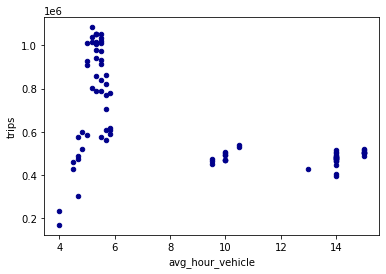

In [175]:
pandasDF = df.sample(0.6).toPandas()
print(pandasDF)
pandasDF.plot.scatter(x='avg_hour_vehicle', y='trips', c='DarkBlue')

In [176]:
from pyspark.ml.feature import VectorAssembler


vectorAssembler = VectorAssembler(inputCols = ['vechicles', 'avg_hour_vehicle'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(df)
vhouse_df = vhouse_df.select(['features', 'trips'])
vhouse_df.show(3)

+--------------------+------+
|            features| trips|
+--------------------+------+
|[41734.0,4.666666...|304485|
|      [13334.0,15.0]|492962|
|       [68046.0,4.5]|460969|
+--------------------+------+
only showing top 3 rows



In [178]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [179]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='trips', maxIter=10, regParam=0.3, elasticNetParam=0.8)

lr_model = lr.fit(train_df)

print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [7.432072029122779,32005.646865074286]
Intercept: -48998.143249689834


In [180]:
trainingSummary = lr_model.summary
print("r2: %f" % trainingSummary.r2)

r2: 0.897513


In [181]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","trips","features").show()

+------------------+-------+--------------------+
|        prediction|  trips|            features|
+------------------+-------+--------------------+
| 933126.7853376999|1037794|[109897.0,5.16666...|
| 530237.8326669515| 479148|      [13341.0,15.0]|
| 489536.6615278035| 397969|      [12171.0,14.0]|
| 935612.6229886606| 915780|      [108796.0,5.5]|
| 498120.7047214403| 504798|      [13326.0,14.0]|
| 726724.8532987379| 769659|[79972.0,5.666666...|
| 967825.1764022764|1017488|[113848.0,5.33333...|
| 978209.7342663588|1084071|[115963.0,5.16666...|
| 933620.8276848557| 934016|      [108528.0,5.5]|
| 856035.4745334452| 875966|[97371.0,5.666666...|
| 489908.2651292597| 517972|      [12221.0,14.0]|
| 530118.9195144855| 502097|      [13325.0,15.0]|
|  902075.588400025| 805244|[105719.0,5.16666...|
|497964.63120882877| 494137|      [13305.0,14.0]|
| 529843.9328494079| 518212|      [13288.0,15.0]|
|398771.05114949885| 470460|      [17184.0,10.0]|
|  869881.424723701| 863049|[99234.0,5.666666...|


In [ ]:
sc.stop()